# Netflix Movies and TV Shows

## Purpose
In this notebook, I apply the CRISP-DM process on the Netflix titles data. This dataset could be founded  in the Kaggle Dataset [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows?datasetId=434238).

***About this Dataset***: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

It's very cool that we have the data. I'm a bit fan of movies and TV shows as well. So we will dig into it and find out more interesting information.

I try to find the answers to these questions:

* What are the oldest movies/TV Shows on Netflix? (Given 5)

* Top 10 countries where most of TV Shows/Movies produced?

* How many movies that "Cameron Diaz" acted in?
* Trending of content (Movies/TV Shows) produced from 2005 until 2021 on Netflix



## Import Libraries  

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocesing 

In [3]:
# load the data
df = pd.read_csv('./netflix_titles.csv')

# Show top 5 data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


As we see, there are NaN values there. So we will clean them soon.

In [4]:
# List data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


In [5]:
# Stats of data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# Mean of null values
df.isnull().mean() / (len(df))*100

show_id         0.000000
type            0.000000
title           0.000000
director        0.003396
cast            0.001064
country         0.001071
date_added      0.000013
release_year    0.000000
rating          0.000005
duration        0.000004
listed_in       0.000000
description     0.000000
dtype: float64

In [7]:
# Data size
df.shape

(8807, 12)

In [8]:
# We would like to know null values for each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [13]:
print("Type: ", df["type"].unique())
print("Release years: ", df["release_year"].unique())
print("Rating: ", df["rating"].unique())

Type:  ['Movie' 'TV Show']
Release years:  [2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987 2012
 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015 2019 2016
 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995 1985 1976 1959
 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970 1973 1925 1974 1960
 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942 1955 1944 1947 1943]
Rating:  ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G' 'NC-17'
 '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


In [14]:
# Oldest and Newest released year for the dataset
print("Oldest year : {}, Newest year: {}".format(min(df["release_year"]), max(df["release_year"])))

Oldest year : 1925, Newest year: 2021


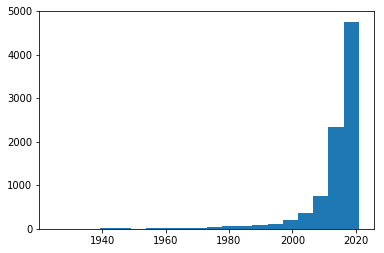

In [15]:
# histogram of release year
plt.hist(df['release_year'], bins=20)
plt.show()

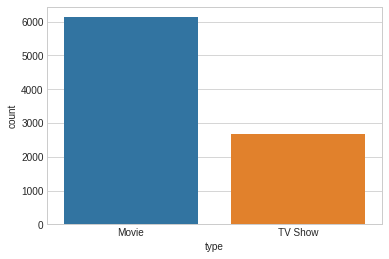

In [16]:
# Show the distribution of type
plt.style.use('seaborn-whitegrid')
sns.countplot(df["type"])

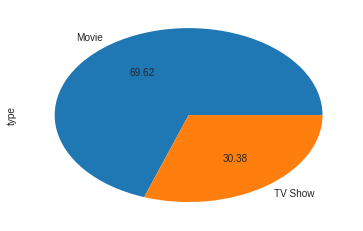

In [17]:
df["type"].value_counts().plot(kind = "pie", autopct = "%.2f")

In [18]:
# Remove Duplicate Movies
df.drop_duplicates(['title','country','type','release_year'],inplace=True)


## Explore data 

#### 1. What are the oldest movies/TV Shows on Netflix? (Given 5)

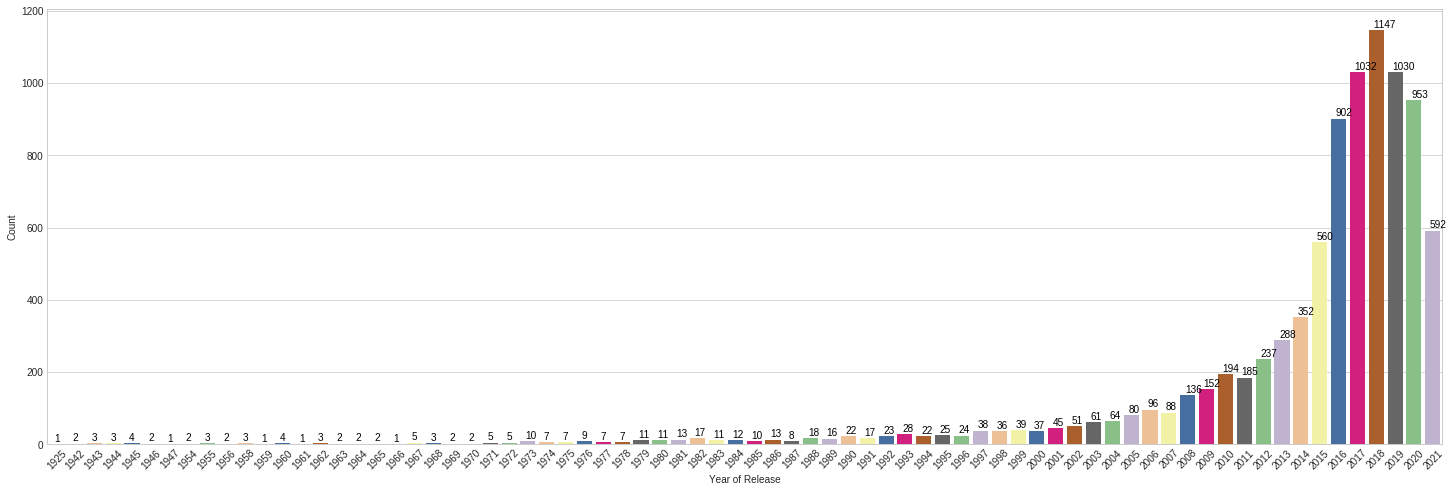

In [19]:
plt.figure(figsize = (25, 8))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'release_year', data = df, palette = "Accent")
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [16]:
# Remove id column
#df.drop(columns=['show_id','description'],inplace=True)
df.sort_values(by="release_year", ascending=True).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...


#### 2. Top 10 countries where most of TV Shows/Movies produced?

Number of countries:  197


Text(0.5,0,'Count')

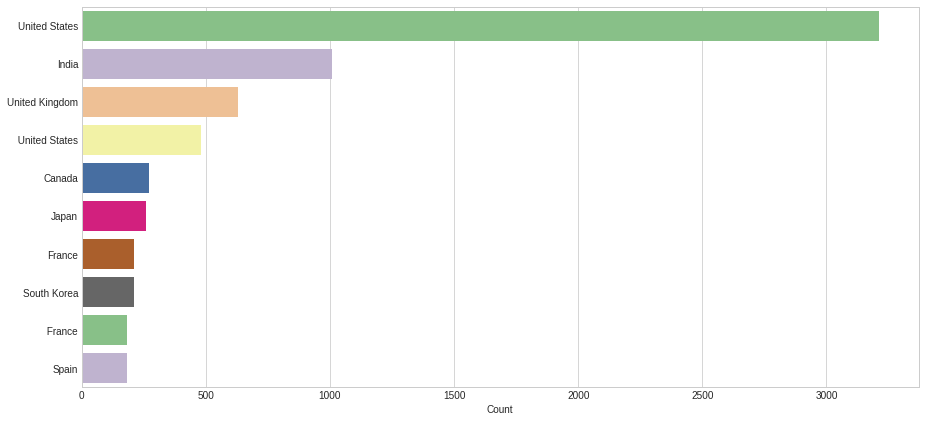

In [21]:
country_count = df.copy()
country_count = pd.concat([country_count, df["country"].str.split(",", expand = True)], axis = 1)
country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()]
print("Number of countries: ", country_count["country"].nunique())

plt.figure(figsize = (15, 7))
country = country_count["country"].value_counts()[:10]
sns.barplot(x = country, y = country.index, palette = "Accent")
plt.xlabel("Count")

As we see, there are two United States. So we should consolidate them into one.

Text(0.5,0,'Count')

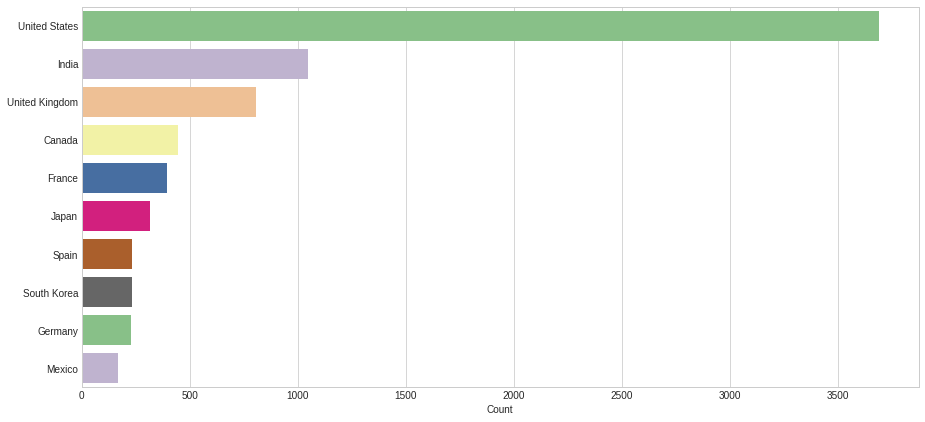

In [22]:
country_count["country"] = country_count["country"].str.strip()

plt.figure(figsize = (15, 7))
country = country_count["country"].value_counts()[:10]
sns.barplot(x = country, y = country.index, palette = "Accent")
plt.xlabel("Count")

We can see that the largest number of Movies/TV Shows comes from United States. It has triple number of Movies/TV Shows than India has. Spain, South Korea and Germany have the same the number of Movies/TV Shows on Netflix. Actually fun!

#### 3. How many movies that "Cameron Diaz" acted in?

In [23]:
updated_df = df.dropna()
print("Number of movied that Cameron Diaz acted in: ", len(updated_df[updated_df["cast"].str.contains("Cameron Diaz")]))

Number of movied that Cameron Diaz acted in:  8


In [24]:
updated_df[updated_df["cast"].str.contains("Cameron Diaz")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany","July 1, 2021",2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...
951,s952,Movie,The Sweetest Thing,Roger Kumble,"Cameron Diaz, Christina Applegate, Selma Blair...",United States,"May 1, 2021",2002,R,89 min,"Comedies, Romantic Movies","After meeting her potential soul mate, a commi..."
6447,s6448,Movie,Charlie's Angels: Full Throttle,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bernie...",United States,"October 1, 2019",2003,PG-13,106 min,"Action & Adventure, Comedies","In this reboot of the TV classic, the Angels a..."
6743,s6744,Movie,Fear and Loathing in Las Vegas,Terry Gilliam,"Johnny Depp, Benicio Del Toro, Tobey Maguire, ...",United States,"November 1, 2019",1998,R,118 min,"Comedies, Cult Movies, Dramas",A sportswriter and his Samoan lawyer embark on...
6826,s6827,Movie,Gangs of New York,Martin Scorsese,"Leonardo DiCaprio, Daniel Day-Lewis, Cameron D...","United States, Italy","August 20, 2019",2002,R,167 min,Dramas,In the crime-ridden slums of New York in the 1...
7546,s7547,Movie,My Sister's Keeper,Nick Cassavetes,"Cameron Diaz, Abigail Breslin, Alec Baldwin, J...",United States,"September 1, 2019",2009,PG-13,109 min,Dramas,A former defense attorney finds herself back i...
8220,s8221,Movie,The Box,Richard Kelly,"Cameron Diaz, James Marsden, Frank Langella, J...",United States,"June 1, 2019",2009,PG-13,116 min,"Sci-Fi & Fantasy, Thrillers",A couple must decide whether to push a button ...
8335,s8336,Movie,The Green Hornet,Michel Gondry,"Seth Rogen, Jay Chou, Cameron Diaz, Tom Wilkin...",United States,"April 18, 2020",2011,PG-13,119 min,"Action & Adventure, Comedies",A hard-partying heir dons a disguise to fight ...


So actress Cameron Diaz acted in 8 movies on Netflix in total!

#### 4. Tredning of content (Movies/TV Shows) produced from 2005 until 2021 on Netflix

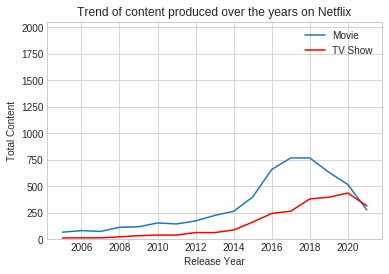

In [25]:
df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')

plt.title('Trend of content produced over the years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Total Content')

df2=df2[df2['Release Year']>=2005]

ax = plt.gca()

x = df2[df2['type'] == 'Movie']
x = x.drop(['type'], axis=1)
x.plot(kind='line',x='Release Year', y='Total Content',ax=ax, legend=False)

y = df2[df2['type'] == 'TV Show']
y = y.drop(['type'], axis=1)
y.plot(kind='line',x='Release Year', y='Total Content', color='red', ax=ax, legend=False)
plt.ylim(0, 2050)

plt.legend(['Movie', 'TV Show'])


***In the histogram, we see that 2005 to 2018 the number of Movies is getting more and more than TV Shows on Netflix. After 2018 the number of Movies is down and in 2021 it seems they have the same number. Interesting!*** 

# Summary


So far, we have been digged into the data to find out some information. Actually, there are a lot more information we can get from this cool data. We can have check top actors or how many genre are there in the data, what movies/tv shows has the maximum length of time etc... <br>
I hope you feel it cool as I have :)<br> 

Hope to see you guy in the next article I will make to explore more information from this data as well using other data techniques such as recommendation very soon!